In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("E:\datafiles\income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income($)')

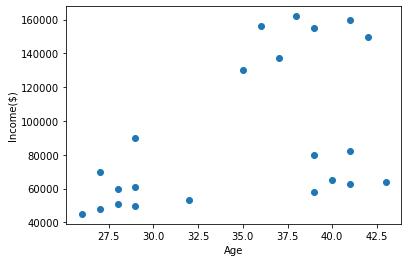

In [3]:
#Now plot a scatter plot based on 'Age','Income($)'

plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [4]:
#Based on the above plot we can define K=3 {n_clusters=3}

#Now fit and predict the dataframe excluding 'Name' column,since 'Name' column is string 
#machine learning can understand only integers/numbers,so ignore 'Name' column

km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1])

In [5]:
#Now it is clear that we have produced 3 clusters (0,1,2)
#Now append this new column 'cluster' into our dataframe

df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


In [6]:
#Now find your cluster_centroids or centers i.e, k=3 for (0,1,2)

km.cluster_centers_

array([[3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04],
       [3.40000000e+01, 8.05000000e+04]])

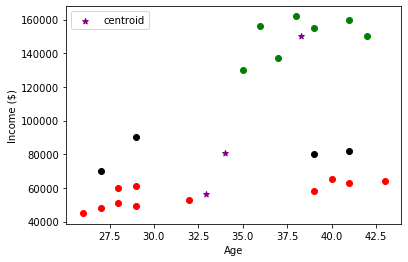

In [7]:
#Separating these 3 different clusters into 3 different dataframes [df1,df2,df3]

df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

In [8]:
#The above scaling is not done properly thats why we are facing the clustering problem in order to
#overcome this problem we have to scale your x-label and y-label properly

#Preprocessing using min_max_scaler for 'Age' and 'Income'

scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [9]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


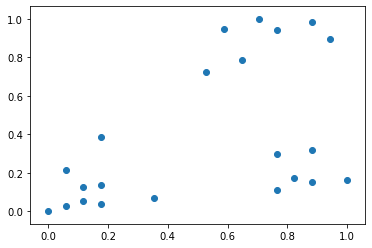

In [10]:
#Now plot a scatter plot based on 'Age','Income($)'

plt.scatter(df.Age,df['Income($)'])

In [11]:
#Based on the above plot we can define K=3 {n_clusters=3}

#Now fit and predict the dataframe excluding 'Name' column,since 'Name' column is string 
#machine learning can understand only integers/numbers,so ignore 'Name' column

km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [12]:
#Now it is clear that we have produced 3 clusters (0,1,2)
#Now append this new column 'cluster' into our dataframe
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [13]:
#Now find your cluster_centroids or centers for (0,1,2) i.e, k=3

km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

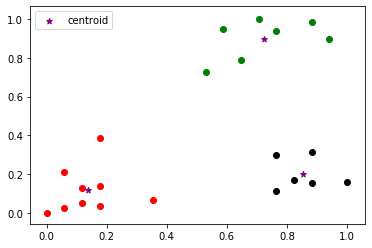

In [14]:
#Now plot a scatter plot for the three(3) clusters (0,1,2) with their centroids or centers

df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [15]:
#If in case if we have 20 features and if we go with scatter plot it will be messy in order tothat use

#Elbowplot

sse = [] #Sum of Square Error :its an array
k_rng = range(1,10) #for all the k results we will find sse and store in array
for k in k_rng: #using the for loop for number of k iterations
    km = KMeans(n_clusters=k) #for each iteration it create new model with cluster=k 
    km.fit(df[['Age','Income($)']]) #by using fit we are making new model with 'Age','Income'
    sse.append(km.inertia_) #the parameter inertia will give the sse this sse is appended to our array

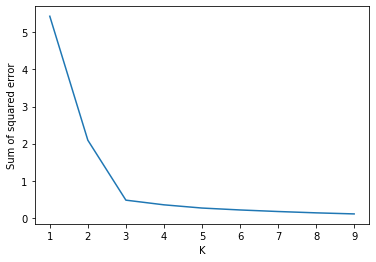

In [16]:
#In the below plot our elbow is fitted at number 3 i.e, k =3(clusters)

plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)